In [6]:
import numpy as np
import pandas as pd


df=pd.read_csv('/content/Car_Mileage_Prediction.csv')
df.head()

df.shape



(980, 10)

In [7]:
df.head(10)

,Car_Model,Engine_Size,Year,Fuel_Type,Mileage,Weight,Transmission,Fuel_Tank_Capacity,Service_History,City
0,simple,5.808422,2010,Diesel,31.043927,1691.952993,Manual,38.504905,0,North Adam
1,imagine,1.194425,2015,Petrol,15.833684,1653.807171,Manual,37.561167,0,Micheleland
2,appear,5.208377,2003,Diesel,12.716929,2128.202900,Manual,42.942509,1,Lisaport
3,him,5.737773,2007,Hybrid,25.766081,1525.699894,Manual,59.624379,0,Ellischester
4,create,5.309426,2014,Petrol,NaN,988.447402,Manual,34.499603,1,Smithside
5,there,1.345552,2022,Diesel,24.406874,1412.061495,Automatic,57.368409,0,North Amandatown
6,manage,5.879711,2013,Electric,29.855323,1666.820036,Automatic,37.047243,1,West John
7,common,3.229293,2011,Diesel,36.674777,1983.715581,Automatic,65.276958,1,Hubbardshire
8,though,1.192179,2001,Diesel,11.709620,1778.885239,Manual,51.665427,1,Lake Regina
9,late,4.815849,2002,Hybrid,35.773850,821.797706,Automatic,43.312198,1,South Anthonyberg


In [8]:
data_cols=df.columns.tolist()
print(data_cols)

['Car_Model', 'Engine_Size', 'Year', 'Fuel_Type', 'Mileage', 'Weight', 'Transmission', 'Fuel_Tank_Capacity', 'Service_History', 'City']


In [9]:
df.dtypes

,0
Car_Model,object
Engine_Size,float64
Year,int64
Fuel_Type,object
Mileage,float64
Weight,float64
Transmission,object
Fuel_Tank_Capacity,float64
Service_History,int64
City,object


In [10]:
df.describe()

,Engine_Size,Year,Mileage,Weight,Fuel_Tank_Capacity,Service_History
count,950.000000,980.000000,931.000000,980.000000,980.000000,980.000000
mean,3.533328,2010.920408,22.652515,1670.939957,49.597549,0.507143
std,1.420977,6.618897,10.290411,498.322233,11.330410,0.500204
min,1.007301,2000.000000,5.013407,802.270055,30.004524,0.000000
25%,2.332085,2005.000000,13.751325,1250.987719,39.369014,0.000000
50%,3.498626,2011.000000,22.594553,1681.086972,49.578153,1.000000
75%,4.813455,2017.000000,31.610702,2115.913782,59.419402,1.000000
max,5.997657,2022.000000,39.964400,2499.149113,69.997647,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Model           980 non-null    object 
 1   Engine_Size         950 non-null    float64
 2   Year                980 non-null    int64  
 3   Fuel_Type           980 non-null    object 
 4   Mileage             931 non-null    float64
 5   Weight              980 non-null    float64
 6   Transmission        980 non-null    object 
 7   Fuel_Tank_Capacity  980 non-null    float64
 8   Service_History     980 non-null    int64  
 9   City                980 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 76.7+ KB


In [12]:
df.isnull().sum()

,0
Car_Model,0
Engine_Size,30
Year,0
Fuel_Type,0
Mileage,49
Weight,0
Transmission,0
Fuel_Tank_Capacity,0
Service_History,0
City,0


In [13]:
df.drop(columns=['City','Fuel_Tank_Capacity','Year','Car_Model'],inplace=True)

In [14]:
df['Engine_Size']=df['Engine_Size'].fillna(df['Engine_Size'].mean())


In [15]:
df['Mileage']=df['Mileage'].fillna(df['Mileage'].mean())

In [16]:
df.isnull().sum()

,0
Engine_Size,0
Fuel_Type,0
Mileage,0
Weight,0
Transmission,0
Service_History,0


In [17]:
num_columns=df.select_dtypes(include=['float64','int64']).columns
num_columns

Index(['Engine_Size', 'Mileage', 'Weight', 'Service_History'], dtype='object')

In [18]:
cat_columns=df.select_dtypes(include=['object']).columns
cat_columns

Index(['Fuel_Type', 'Transmission'], dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
lable_encoder=LabelEncoder()
for column in cat_columns:
  df[column]=lable_encoder.fit_transform(df[column])

In [20]:
df.head(20)

,Engine_Size,Fuel_Type,Mileage,Weight,Transmission,Service_History
0,5.808422,0,31.043927,1691.952993,1,0
1,1.194425,3,15.833684,1653.807171,1,0
2,5.208377,0,12.716929,2128.202900,1,1
3,5.737773,2,25.766081,1525.699894,1,0
4,5.309426,3,22.652515,988.447402,1,1
5,1.345552,0,24.406874,1412.061495,0,0
6,5.879711,1,29.855323,1666.820036,0,1
7,3.229293,0,36.674777,1983.715581,0,1
8,1.192179,0,11.709620,1778.885239,1,1
9,4.815849,2,35.773850,821.797706,0,1


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[num_columns]=scaler.fit_transform(df[num_columns])

In [23]:
df.head(20)

,Engine_Size,Fuel_Type,Mileage,Weight,Transmission,Service_History
0,0.962080,0,0.744772,0.524305,1,0.0
1,0.037497,3,0.309584,0.501825,1,0.0
2,0.841839,0,0.220409,0.781395,1,1.0
3,0.947923,2,0.593765,0.426330,1,0.0
4,0.862088,3,0.504681,0.109718,1,1.0
5,0.067781,0,0.554876,0.359361,0,0.0
6,0.976365,1,0.710764,0.509494,0,1.0
7,0.445257,0,0.905879,0.696246,0,1.0
8,0.037047,0,0.191589,0.575536,1,1.0
9,0.763182,2,0.880102,0.011508,0,1.0


In [25]:
X=df.drop(columns=['Mileage'])
y=df['Mileage']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
linreg_model=LinearRegression()
linreg_model.fit(X_train,y_train)

LinearRegression()

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
linreg_pred=linreg_model.predict(X_test)

linreg_mse=mean_squared_error(y_test,linreg_pred)
linreg_mae=mean_absolute_error(y_test,linreg_pred)
linreg_r2=r2_score(y_test,linreg_pred)

In [31]:
print(f'Mean Squared Error:,{linreg_mse}')
print(f'Mean Absolute Error:,{linreg_mae}')
print(f'R-squared:,{linreg_r2}')

Mean Squared Error:,0.0808737973637571
Mean Absolute Error:,0.24116925494770905
R-squared:,-0.013230759113927126


In [32]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
rf_pred=rf_model.predict(X_test)
rf_mse=mean_squared_error(y_test,rf_pred)
rf_mae=mean_absolute_error(y_test,rf_pred)
rf_r2=r2_score(y_test,rf_pred)

In [34]:
print(f'Mean Squared Error:,{rf_mse}')
print(f'Mean Absolute Error:,{rf_mae}')
print(f'R-squared:,{rf_r2}')

Mean Squared Error:,0.09422072349693605
Mean Absolute Error:,0.2574668058789253
R-squared:,-0.18044828244762012


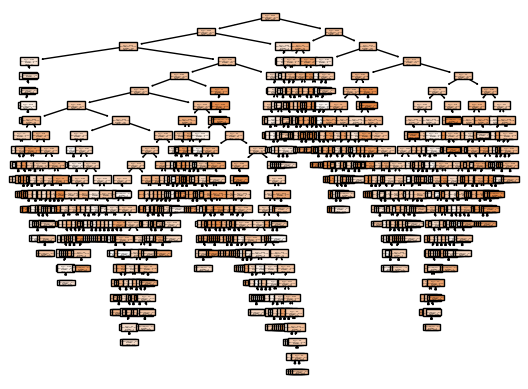

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(rf_model.estimators_[0],filled=True)
plt.show()

In [36]:
best_model=linreg_model if linreg_mse < rf_mse else rf_model

In [37]:
import pickle
with open('best_model.pkl','wb') as file:
  pickle.dump(best_model,file)

  print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
